# MIDTERM

##Importing Libraries

In [1]:
#these libraries are for all the code below
import numpy as np # imports numpy the python numbers library. abbreviates it to np
import matplotlib.pyplot as plt # imports matplotlib.pyplot which allows us to visualize our data easier and make direct edits to the visualization of it. abbreviates it to plt.

#these libraries are for the url image and filtering/convolving it
from PIL import Image
import cv2
from skimage import io as io

#these libraries are for the game of life
import torch.nn.functional as F
from torch.nn.functional import *
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import time
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')
def make_ani(A, colormap='gray'):

    fig, ax = plt.subplots()
    im = ax.imshow(A[0,:,:], cmap = colormap);
    ax.axis('off')
    fig.set_size_inches(12, 12)

    def animate(data, im):
        im.set_data(data)

    def step():
        for i in range(A.shape[0]):
            data = A[i,:,:]
            yield data

    return animation.FuncAnimation(fig, animate, step, interval=100, repeat=True, fargs=(im,))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(8, 8)
    plt.show()

##Plot random binary image 10x10

In [2]:
array_size = 10 #defines a variable "array_size" as "10"

In [3]:
binary_image = np.random.random((array_size,array_size)) #defines a variable "binary_image" as a 10x10 array of random numbers between 0 and 1

In [4]:
binary_image.shape #returns the randomly generated 10x10 array

(10, 10)

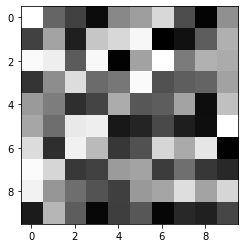

In [5]:
plt.imshow(binary_image,cmap='gray') #plt.imshow() shows the array as an image where the colors represent different values. 
                                     #adding the ",cmap= 'gray'" is telling the program to represent the image in grayscale.

##Plot random rgb image 10x10

In [6]:
array_size = 10 #defines a variable "array_size" as "10"

In [7]:
rgb_image = np.random.random((array_size,array_size,3)) #defines a variable "rgb_image" as a 10x10 array of random numbers between 0 and 1
                                      #the 3 tells the array that I want 3 color channels

In [8]:
rgb_image #returns the randomly generated 10x10 array

array([[[0.85569034, 0.07926335, 0.59680103],
        [0.91893233, 0.27202416, 0.46515457],
        [0.66921289, 0.23409474, 0.62713957],
        [0.1081423 , 0.6002242 , 0.30855172],
        [0.52073848, 0.53533286, 0.86027703],
        [0.91917483, 0.41745099, 0.4896968 ],
        [0.57300263, 0.9265469 , 0.52500481],
        [0.49545373, 0.63092702, 0.43048893],
        [0.60302811, 0.88188768, 0.11494874],
        [0.11539455, 0.5244326 , 0.12745023]],

       [[0.05636951, 0.80109071, 0.09634117],
        [0.05920528, 0.40691327, 0.70243957],
        [0.550481  , 0.34288976, 0.40586214],
        [0.39599388, 0.71995908, 0.98955988],
        [0.93084667, 0.95310671, 0.58790898],
        [0.8658759 , 0.73943025, 0.6728275 ],
        [0.90557491, 0.20122345, 0.25048682],
        [0.04265632, 0.07167805, 0.93239295],
        [0.45376071, 0.27388644, 0.18833354],
        [0.28225056, 0.96596316, 0.53145738]],

       [[0.08604532, 0.32201333, 0.50161353],
        [0.86074169, 0.0407225

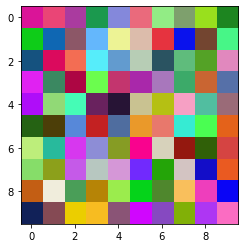

In [9]:
plt.imshow(rgb_image) #plt.imshow() shows the array as an image where the colors represent different values. 
                      #removing the ",cmap= 'gray'" allows the program to represent the values with color. 

##Load image from url and plot it

In [10]:
kermit = io.imread("https://i.redd.it/3b82bc90lvp41.jpg") #io.imread converts the url image into an array that can be read by matplot.lib

In [11]:
print(kermit) #prints the number array of the image "kermit"

[[[234 222 208]
  [234 222 208]
  [234 222 208]
  ...
  [ 96  91  85]
  [126 123 116]
  [188 185 180]]

 [[234 222 208]
  [234 222 208]
  [234 222 208]
  ...
  [ 96  91  85]
  [126 123 116]
  [188 185 180]]

 [[234 222 208]
  [234 222 208]
  [234 222 208]
  ...
  [ 96  91  85]
  [126 123 116]
  [188 185 180]]

 ...

 [[ 34  24  23]
  [ 34  24  23]
  [ 34  24  23]
  ...
  [ 41  37  36]
  [ 85  81  80]
  [165 161 162]]

 [[ 34  24  23]
  [ 34  24  23]
  [ 34  24  23]
  ...
  [ 41  37  36]
  [ 85  81  80]
  [165 161 162]]

 [[ 34  24  23]
  [ 34  24  23]
  [ 34  24  23]
  ...
  [ 40  36  35]
  [ 85  81  80]
  [165 161 162]]]


In [12]:
kermit.shape #returns the number of rows, columns, and channels in the array "kermit", respectively

(2000, 1226, 3)

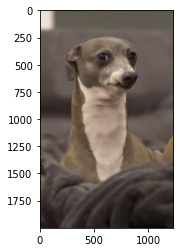

In [13]:
plt.imshow(kermit) #plots the array "kermit"

##Create a random 3x3 filter and plot it

In [14]:
filter = np.random.random((3,3)) #creates a random 3x3 number array and names it filter

In [15]:
filter.shape #returns the shape of the filter for confirmation 

(3, 3)

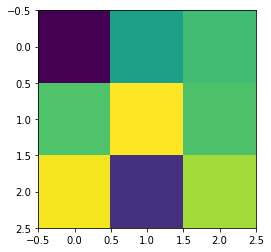

In [16]:
plt.imshow(filter) #plots the filter 

##Convolve your random filter with the image you loaded and plot the feature map

In [17]:
def conv2(c,f):                                                            #this defines the convolution function (conv2) as c and f, where c is the convolved image and f is the filter
    c3 = np.zeros(c.shape)                                                 #this creates an array of zeros to store the new convolved image in
    for i in range(1,c.shape[0]-1):                                        #i is the row
        for j in range(1,c.shape[1]-1):                                    #j is the column 

            c3[i,j] = f[0,0] * c[i-1,j-1]  \
            +         f[0,1] * c[i-1,j]    \
            +         f[0,2] * c[i-1,j+1]  \
            +         f[1,0] * c[i,j-1]    \
            +         f[1,1] * c[i,j]      \
            +         f[1,2] * c[i,j+1]    \
            +         f[2,0] * c[i+1,j-1]  \
            +         f[2,1] * c[i+1,j]    \
            +         f[2,2] * c[i+1,j+1]
            
#"\" means continue on the next line, it just wraps it. 
#the matrix looks like this because python counts 0 as 1. 
#       0,0   0,1   0,2
#       1,0   1,1   1,2
#       2,0   2,1   2,2
#so we're applying a filter to the center (1,1) and telling all the neighbors to apply the filter what is occuring at the cente
    return c3

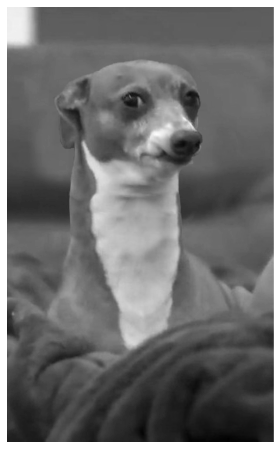

In [18]:
kermit = io.imread("https://i.redd.it/3b82bc90lvp41.jpg") #io.imread converts the url image into an array that can be read by matplot.lib
convolved_kermit = kermit[:,:,0] #here I remove color channels from the image so that I can convolve it. You can convolve an RGB image but my convolution function is for grayscale images
convolved_kermit = convolved_kermit.astype(float) #here I'm confirming that my convolved image is in fact a float
convolved_kermit /= 255.0 #this is a brightness setting for my image 
plot(convolved_kermit) #this plots the convolved image

In [19]:
feature_map = conv2(convolved_kermit,filter) #here I convolve my image with my randomly made 3x3 filter

In [20]:
feature_map.shape #here I'm double checking that my feature map has no color channels

(2000, 1226)

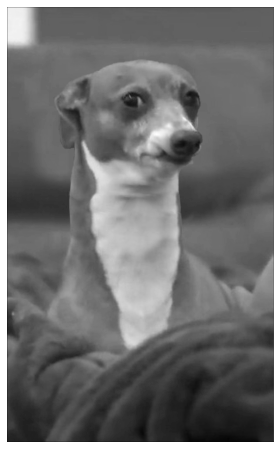

In [21]:
plot(feature_map) #plotting the new convolved image (feature_map). It's not been changed too much (it's just a little blurry) because my filter is random and not designed to change it in any specific way

In [22]:
edge_filter = np.matrix([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]) #this is a convolution matrix that has been created by other individuals and outlines edges. 

In [23]:
kermit_edge = conv2(convolved_kermit,edge_filter) #here I'm convolving my image of kermit with the edge filter

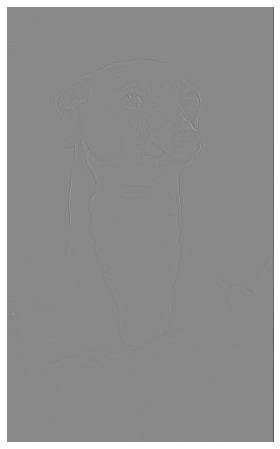

In [24]:
plot(kermit_edge) #plots the convolved image

##Run game of life in pytorch starting from random 20x20 grid plot initial and final conditions

In [25]:
world = (np.random.random((100,100)) > 0.5) #creates the world in the game of life which is 100x100 array of random numbers between 0 and 1
                                        #then tells the program to separate the randomly generated array by changing all the numbers to either true (>0.5) or false (<0.5)
filter_gol = np.matrix([[1,1,1],[1,0,1],[1,1,1]]) #creates the filter that tells the program to look at it's neighbors

In [26]:
def conv2(world,filter_gol): #here we define the convolution function with "world" being what is convolved and "filter_gol" is the filter we are convolving the image with

    n = conv2d(world.type(torch.int),filter_gol.type(torch.int)) #this line of code is the actual covolution of the images that I have named gol (game of life)
    n = pad(n, (1, 1, 1, 1)) #pad() is a pytorch function that pads the sides of the image. we did that here with 1 pixel per side

    return n #returns the new convolved array

In [27]:
print(world) #prints the world which shows a Boolean array of true and false 

[[ True False  True ... False False False]
 [False False False ...  True False False]
 [ True False  True ...  True  True False]
 ...
 [False  True  True ...  True  True False]
 [ True False  True ... False False  True]
 [False  True  True ...  True  True False]]


In [28]:
steps = 1000
ani = torch.zeros((steps,100,100)) #creates an array of zeros so later we can use it to store the frames for the animation
world = torch.tensor(world.astype(int))[None,None,:,:] #world.astype(int) changes the boolean "true or false" into either 1 (true) or 0 (false)
                                                       #torch.tensor() wraps the array in a tensor which allows the pytorch program to work with it better
                                                       #[None,None,:,:] is telling the program, pytorch which works in 4D, to ignore the first two dimensions
                                                       #the first two dimensions are batch size and color dimension
                                                       #the following two dimensions are rows and columns, which is obviously what we care about
filter_gol = torch.tensor(filter_gol.astype(int))[None,None,:,:] #filter_gol.astype(int) ensures that the filter is an integer
                                                                 #torch.tensor() wraps the array in a tensor which allows the pytorch program to work with it better
                                                                 #[None,None,:,:] is telling the program, pytorch which works in 4D, to ignore the first two dimensions
                                                                 #the first two dimensions are batch size and color dimension
                                                                 #the following two dimensions are rows and columns, which is obviously what we care about

In [29]:
for i in range(steps): 

    n = conv2(world,filter_gol) #this function is telling the program to convolve at each step in the n
    
    world = (world * (n==2)) + (n==3)
    
    ani[i] = world #animates the iterations

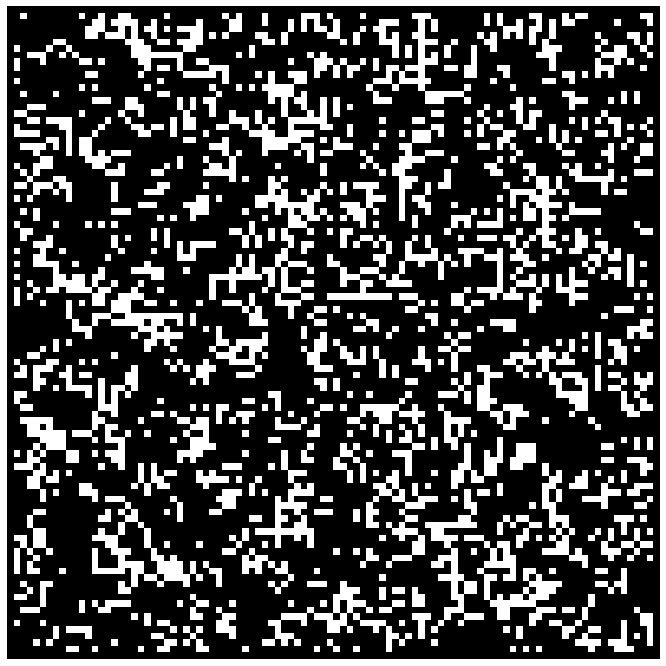

In [30]:
make_ani(ani) #creates the animation